# Question 4

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
# from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [2]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [3]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          image: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """
    random_pixels = int(0.1 * img.size)
    x_ax, y_ax = image.shape[:2]
    for i in range(random_pixels):
      x = np.random.randint(x_ax)
      y = np.random.randint(y_ax)
      color = np.random.randint(255)
      if (color % 2 == 0):
        img[x, y] = 0
      else:
        img[x, y] = 255
    return img

(-0.5, 374.5, 499.5, -0.5)

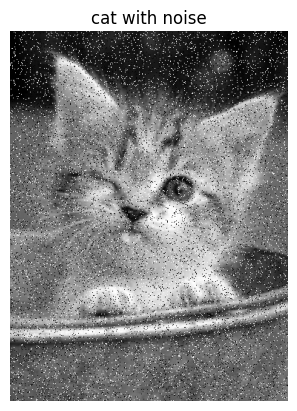

In [4]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [5]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  w, h = filter_size//2, filter_size//2
  image = np.pad(img, (w, h), mode="reflect") #  pad the array with reflect data
  return image

In [6]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  dx, dy = filter_size//2, filter_size//2
  output = np.zeros_like(image, dtype=np.int32) 
  x, y = output.shape[:2]
  for i in range(dx, x-dx):
    for j in range(dy, y-dy):
      output[i, j] = np.average(image[i-dx:i+dx, j-dx:j+dx]) # average of the surrounding pixels
  result = output[dx: x - dx, dy : y - dy]
  return result

In [7]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  dx, dy = filter_size//2, filter_size//2
  output = np.zeros_like(image, dtype=np.int32)
  x, y = output.shape[:2]
  for i in range(dx, x-dx):
    for j in range(dy, y-dy):
      output[i, j] = np.median(image[i-dx:i+dx, j-dy:j+dy]) #  compute the median value of each pixel's neighborhood
  result = output[dx:x-dx, dy:y-dy]
  return result

In [8]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size, filter_size))
    for i in range(filter_size):
        for j in range(filter_size):
            kernel[i,j] = np.exp(-(pow(i - filter_size // 2, 2) + pow(j - filter_size // 2, 2)) / (2 * pow(std, 2))) # Gaussian formula
    kernel = kernel / np.sum(kernel)
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 374.5, 499.5, -0.5)

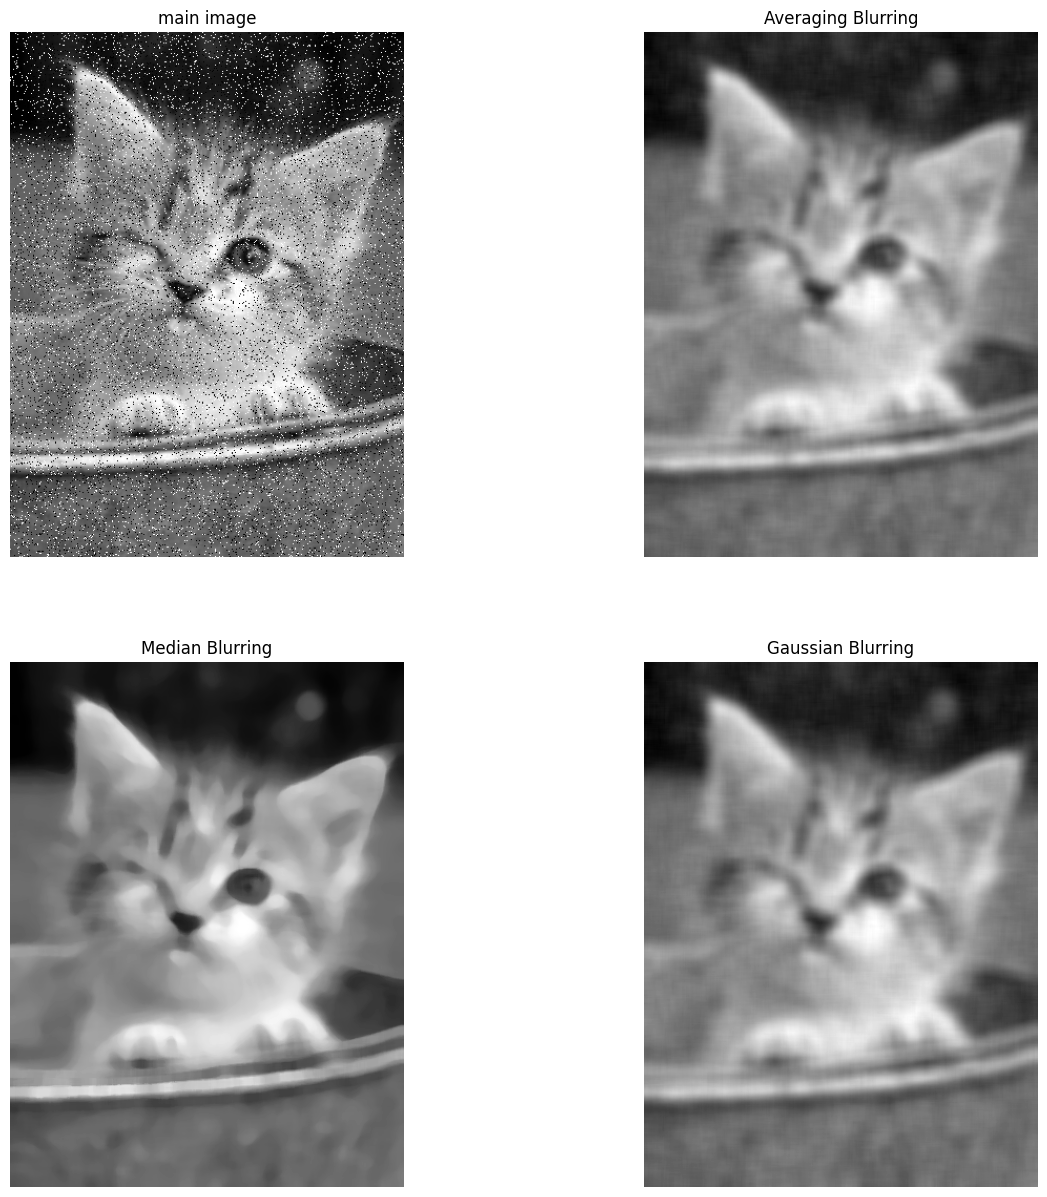

In [12]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [10]:
AveragingBlurring = cv2.blur(image, (10, 10))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image, (15, 15), 30)

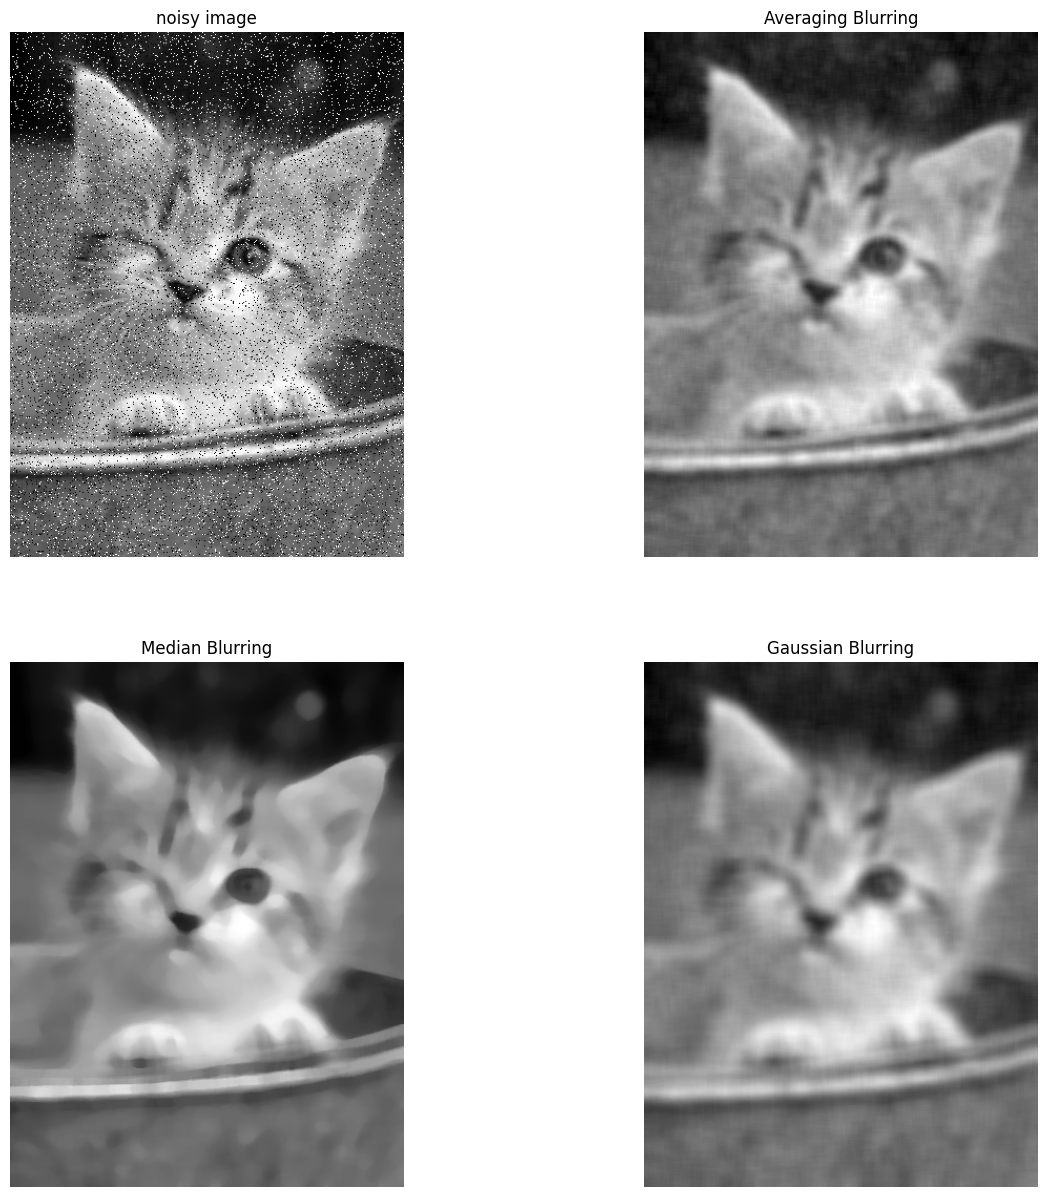

In [11]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")